# Exploratory Data Analysis (EDA): Footwear Sales (2018–2026)

Before building models or drawing conclusions, it is essential to develop a strong understanding of the dataset. Exploratory Data Analysis (EDA) helps us examine just that.

In this section, we will:
- Review the overall structure of the dataset (features, data types, and size)
- Identify inconsistent entries
- Detect potential outliers
- Assess whether any variables require cleaning, transformation, or further investigation

By performing this initial analysis, we ensure that the dataset is reliable and well-prepared for deeper statistical analysis and visualization.

--------------------------------------------------------------

## 1. Import the neccesary packages:
Importing the python packages I will be using to better understand the data <br>
Create a .venv from the requirements.txt

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

## 2. Explore the dataset and import the CSV
Import the data from the dataset and start ot analyze it. 

In [2]:
df_sales = pd.read_csv("../../Databases/global_sports_footwear_sales_2018_2026.csv")
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
7011,ORD107011,2023-08-16,Reebok,Model-278,Training,Men,9,Black,110,30,77.00,1,77.00,Bank Transfer,Retail Store,UAE,Low,3.2
25207,ORD125207,2025-02-26,Nike,Model-565,Lifestyle,Unisex,7,Blue,79,10,71.10,1,71.10,Bank Transfer,Retail Store,Germany,Medium,4.2
26401,ORD126401,2021-01-16,Reebok,Model-502,Running,Men,8,Red,83,5,78.85,1,78.85,Wallet,Retail Store,Germany,Low,4.4
22160,ORD122160,2018-05-08,Puma,Model-582,Training,Unisex,7,White,60,10,54.00,3,162.00,Card,Online,USA,Medium,4.3
12290,ORD112290,2023-04-18,Reebok,Model-607,Lifestyle,Unisex,7,White,112,10,100.80,2,201.60,Wallet,Retail Store,India,High,3.5


Now we’ll check the data types for each column and check the summary of the numerical columns so we can determine our next action.

In [3]:
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  str    
 1   order_date             30000 non-null  str    
 2   brand                  30000 non-null  str    
 3   model_name             30000 non-null  str    
 4   category               30000 non-null  str    
 5   gender                 30000 non-null  str    
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  str    
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  str    
 14  sales_channel          30000 non-null  str    
 15  country      

### Key Data Integrity Observations

- No null values were detected across any of the columns.
- All columns contain approximately 30,000 records, indicating that the dataset does not have missing entries.
- The majority of features are stored as string (`str`) data types, which should be carefully considered when designing SQL tables and defining appropriate column types.
- There are no object types which is good for data integrity and keeps a consistent wokflow

In [4]:
df_sales.describe()

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


### Key Data Description Observations

- Data is daily based on units sold that range from min. 1.0 to max. 4.0 and which is further confirmed by checking the Model-686 sample below.
- From a business standpoint discounts range from 0% to 30% at max
- Customer rating ranges probably from 0 to 5 but the std is so low and the mean is 4 so that means rating mainly are in the upper ratings

In [5]:
df_sales[df_sales["model_name"] == "Model-686"].sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
20846,ORD120846,2021-11-08,Reebok,Model-686,Basketball,Unisex,6,Red,60,30,42.00,1,42.00,Card,Online,UK,Low,3.4
15470,ORD115470,2022-01-08,Puma,Model-686,Gym,Women,11,Red,186,5,176.70,4,706.80,Card,Retail Store,Germany,Low,3.9
3993,ORD103993,2022-12-03,New Balance,Model-686,Running,Men,6,Black,177,5,168.15,1,168.15,Wallet,Online,UAE,Medium,4.7
14031,ORD114031,2020-07-08,Puma,Model-686,Gym,Unisex,6,Blue,121,15,102.85,1,102.85,Cash,Retail Store,UAE,Medium,4.7
5665,ORD105665,2026-06-25,ASICS,Model-686,Gym,Women,11,Black,62,10,55.80,1,55.80,Card,Retail Store,USA,Low,4.6


In [7]:
# Change the data type of some of the variables for memory saving purposes
convert_dict = {
    'brand': 'category',
    'category': 'category',
    'gender': 'category',
    'color': 'category',
    'payment_method': 'category',
    'sales_channel': 'category',
    'country': 'category',
    'customer_income_level': 'category'
}

df_sales = df_sales.astype(convert_dict)
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               30000 non-null  str     
 1   order_date             30000 non-null  str     
 2   brand                  30000 non-null  category
 3   model_name             30000 non-null  str     
 4   category               30000 non-null  category
 5   gender                 30000 non-null  category
 6   size                   30000 non-null  int64   
 7   color                  30000 non-null  category
 8   base_price_usd         30000 non-null  int64   
 9   discount_percent       30000 non-null  int64   
 10  final_price_usd        30000 non-null  float64 
 11  units_sold             30000 non-null  int64   
 12  revenue_usd            30000 non-null  float64 
 13  payment_method         30000 non-null  category
 14  sales_channel          30000 non-null  category
 

Changed the 4.1 MB memory usage to 2.5 MB thanks to the category data type change in many of the variable.

In [9]:
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
13662,ORD113662,2021-07-01,ASICS,Model-649,Training,Men,9,White,99,0,99.00,1,99.00,Bank Transfer,Retail Store,USA,Low,4.5
19359,ORD119359,2023-12-03,Adidas,Model-556,Lifestyle,Women,10,Blue,137,10,123.30,4,493.20,Bank Transfer,Retail Store,USA,High,4.9
17724,ORD117724,2021-10-27,Nike,Model-773,Gym,Men,9,Red,219,5,208.05,3,624.15,Bank Transfer,Online,UK,Medium,3.2
2429,ORD102429,2021-10-09,New Balance,Model-138,Gym,Women,9,Grey,194,30,135.80,4,543.20,Wallet,Online,UAE,Low,3.3
12356,ORD112356,2022-01-25,Adidas,Model-177,Running,Women,11,Blue,118,15,100.30,1,100.30,Card,Online,India,High,3.8


## 3. Analysing Normal Distribution in the data
It is neccessary to understand if our variables follow a normal distribution or not

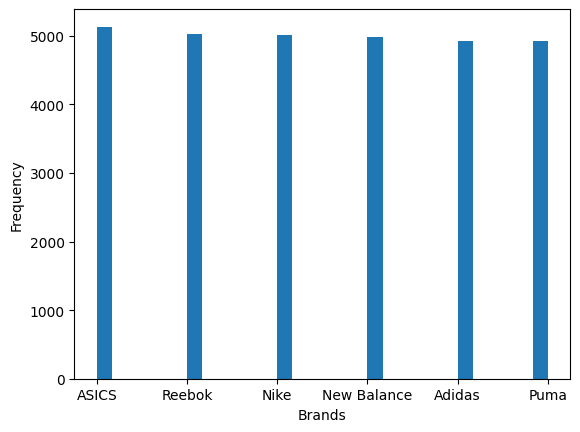

In [11]:
# Check the normal distribution of brands
data_to_plot = df_sales['brand']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Brands')
plt.ylabel('Frequency')

# Display the plot
plt.show()

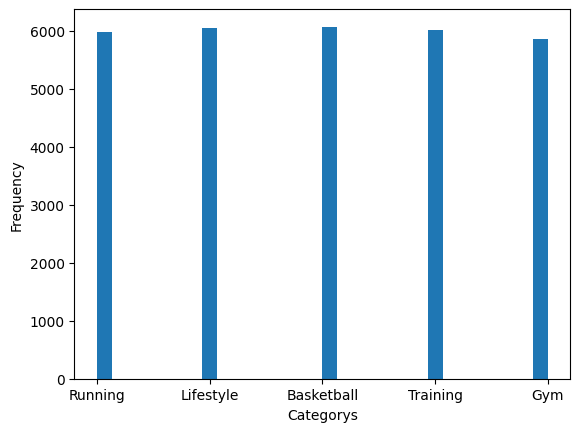

In [ ]:
# Check the normal distribution of categorys of shoes
data_to_plot = df_sales['category']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Categorys')
plt.ylabel('Frequency')

# Display the plot
plt.show()

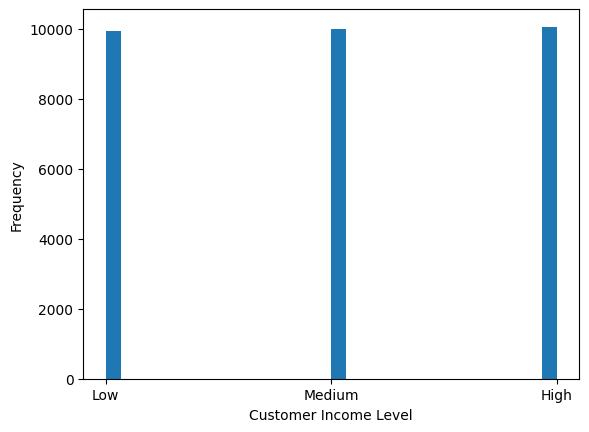

In [16]:
# Check the normal distribution of customer income level    
data_to_plot = df_sales['customer_income_level']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Customer Income Level')
plt.ylabel('Frequency')

# Display the plot
plt.show()

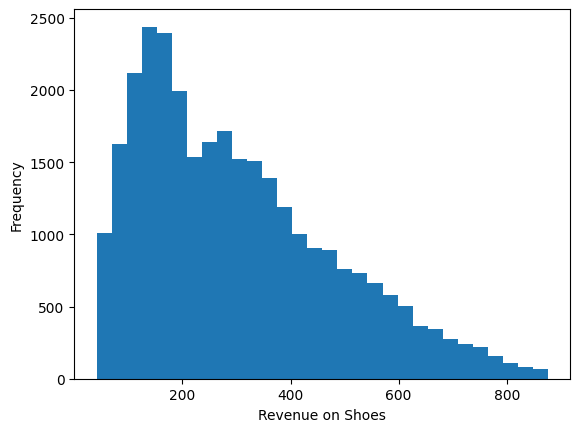

In [17]:
# Check the normal distribution of revenue
data_to_plot = df_sales['revenue_usd']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Revenue on Shoes')
plt.ylabel('Frequency')

# Display the plot
plt.show()